### Overlap and assessment

In [14]:
import pandas as pd
import numpy as np
from matplotlib_venn import venn3, venn3_circles, venn2, venn2_circles
import matplotlib.pyplot as plt

In [4]:
data_d = pd.read_csv('../data/tech.csv')
data_p = pd.read_csv('../data/tech2.csv')
print('Deterministic: {}\nProbabilistic: {}'.format(len(data_d), len(data_p)))

Deterministic: 2052
Probabilistic: 7530


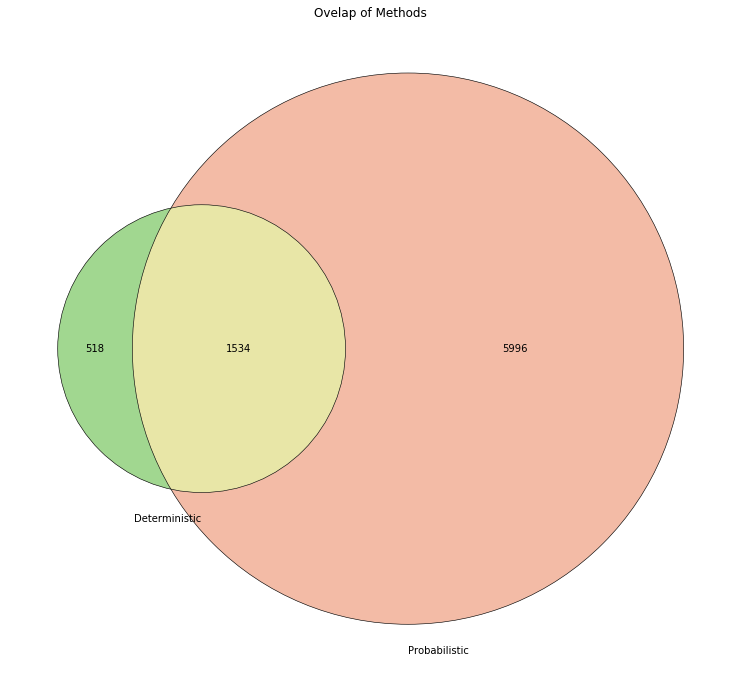

In [17]:
#print(len(table['link'].unique())) #all the unique links found in all the methods
plt.figure(figsize=(16, 12))
v = venn2([set(data_d.id), 
       set(data_p.id)], 
      set_labels = ("Deterministic", 'Probabilistic'),
      set_colors=('#44b023', '#e8784f'), alpha=0.5)#
for text in v.set_labels:
    text.set_fontsize(10)
for text in v.subset_labels:
    text.set_fontsize(10)
c = venn2_circles([set(data_d.id), 
       set(data_p.id)], linestyle='solid', linewidth=0.6)
plt.title("Ovelap of Methods")
#plt.savefig('../plots/venn-methods.png')
plt.show()

In [19]:
data_inner = pd.merge(data_p,data_d,
    how='inner',on='id',suffixes=('_prob', '_det'))

In [20]:
print(len(data_inner))
print(len(list(set(list(data_d.id)) - set(list(data_p.id)))))
print(len(list(set(list(data_p.id)) - set(list(data_d.id)))))

1534
518
5996


---

How does it look the ones that match on deterministic but not probabilistic?  
How does it look all the way around?

In [23]:
#data_inner.columns
inner_table = data_inner[['id','category']]
inner_table.groupby('category').count()['id'].sort_values().head()#.plot()

category
Building design nanomaterial    1
heat pump Vehicle design        1
heat pump energy storage        1
heat pump energy tower          1
heat pump renewable energy      1
Name: id, dtype: int64

In [24]:
inner_table.head()

,id,category
0,835398,reforestation distributed production
1,835541,forest management Waste management
2,812602,bioplastic protection of soil
3,811592,DSM Cleaner product
4,847641,Waste management waste management nutrient man...


In [25]:
#random choice
sample_list = list(np.random.choice(list(inner_table.id), 91, replace=False))

In [26]:
cordish2020 = pd.read_excel('../data/cordis-h2020projects.xlsx')

In [95]:
#create a sample set to assess
#cordish2020[cordish2020.id.isin(sample_list)][['title','objective','coordinator']].to_csv('../data/sample.csv')

In [28]:
cordish2020[cordish2020.id.isin(list(inner_table.id))].to_csv('../data/inner_table.csv')

---

### After assessment

In [96]:
sample_lab = pd.read_csv('../data/sample_lab.csv')

In [102]:
sample_lab.label.sum()*100/len(sample_lab)

93.4065934065934

---
### Demanded technologies

In [103]:
categories = pd.read_excel('../data/categories.xls')
categories = categories.fillna(method='ffill')
categories.columns = ['sector','technology_group','technology','description','technology_term','source','priority']
categories.head()

,sector,technology_group,technology,description,technology_term,source,priority
0,Energy,Solar energy sources,solar PV,Also “solar photovoltaic”; technology of using...,"photovoltaic, PV, “solar cell”",https://www.ctc-n.org/technologies/solar-pv,1
1,Energy,Solar energy sources,concentrated solar power (CSP),Technology of producing electricity by concent...,"“concentrated solar power”, CSP, “concentrated...",https://setis.ec.europa.eu/technologies/concen...,1
2,Energy,Solar energy sources,solar heating,Technology of capturing the sun's radiation an...,“solar heating”,https://www.ctc-n.org/technologies/solar-heating,0
3,Energy,Solar energy sources,solar dryer,"Technology of drying substances, especially fo...",“solar dryer”,https://www.ctc-n.org/technologies/solar-dryer,0
4,Energy,Solar energy sources,solar water pump,Technology of powering electrical water pumps ...,“solar water pump”,https://www.ctc-n.org/technologies/solar-water...,0


In [106]:
len(categories.technology)

99

In [107]:
categories.priority.sum()

42

In [164]:
100*categories.priority.sum()/len(categories.technology)

42.42424242424242

---
### Supplied technologies

In [203]:
technology_table = pd.DataFrame()
# unnest the messy matches
list_technologies = data_inner['matches_technology_det']
number_matches, cleaned_lists = [], []
for l in list_technologies:
    new_l = l.replace("[","").replace("]","").replace(" '","").replace("'","").replace("'","").split(',')
    cleaned_lists.append(new_l)
    number_matches.append(len(new_l))
technology_table['technology_terms'] = [y for x in cleaned_lists for y in x] 
#len(number_matches) == len(data_inner.id)
#create a list with project id that equals the terms
ids = [[i]*j for i,j in zip(data_inner.id, number_matches)]   
technology_table['id'] =  [y for x in ids for y in x]

In [204]:
categories.head()

,sector,technology_group,technology,description,technology_term,source,priority
0,Energy,Solar energy sources,solar PV,Also “solar photovoltaic”; technology of using...,"photovoltaic, PV, “solar cell”",https://www.ctc-n.org/technologies/solar-pv,1
1,Energy,Solar energy sources,concentrated solar power (CSP),Technology of producing electricity by concent...,"“concentrated solar power”, CSP, “concentrated...",https://setis.ec.europa.eu/technologies/concen...,1
2,Energy,Solar energy sources,solar heating,Technology of capturing the sun's radiation an...,“solar heating”,https://www.ctc-n.org/technologies/solar-heating,0
3,Energy,Solar energy sources,solar dryer,"Technology of drying substances, especially fo...",“solar dryer”,https://www.ctc-n.org/technologies/solar-dryer,0
4,Energy,Solar energy sources,solar water pump,Technology of powering electrical water pumps ...,“solar water pump”,https://www.ctc-n.org/technologies/solar-water...,0


In [205]:
matrix = []
for term in categories['technology_term']:
    row = [x.strip() for x in term.split(',')]
    row = [i.replace('“', '').replace('”', '') for i in row]
    matrix.append(row)

In [206]:
tech_dict = {key: value for (key, value) in zip(categories.technology, matrix)}

In [208]:
technology_table['category'] = None

In [212]:
for i in technology_table.index:
    for k,v in tech_dict.items():
        for j in v:
            if technology_table.loc[i,'technology_terms'] == j:
                technology_table.loc[i, 'category'] = k

In [235]:
technology_table.sort_values('id').head() #repeated ids

,technology_terms,id,category
1405,recycling,633192,recycling
1404,efficient lighting,633192,low GHG lighting
845,recycling,633962,recycling
844,bioplastic,633962,bioplastics
935,soil management,635201,soil management


In [238]:
technology_table.groupby('category').count()['id'].sort_values(ascending=False)

category
low GHG steel                                      385
solar PV                                           302
recycling                                          211
energy storage                                     190
fuel cell                                           79
waste management                                    77
geothermal                                          70
carbon capture and storage                          69
concentrated solar power (CSP)                      68
grid management                                     67
combined heat and power (CHP)                       58
electric vehicle design                             43
biofuel                                             42
district heating and/or cooling                     40
traffic management                                  39
heat pumps                                          37
offshore wind                                       37
wave energy                                         29
n

In [242]:
#put the money and the rest of features
cordish2020[['id','ecMaxContribution']].head() #'acronym','title','startDate','objective',

,id,ecMaxContribution
0,837750,19630411.18
1,818184,6004252.50
2,815147,4991323.75
3,817642,5995904.00
4,825731,4017817.50


In [262]:
cost_per_category = pd.merge(technology_table, cordish2020[['id','ecMaxContribution']], how='left', on='id')
cost_per_category = cost_per_category.groupby('category').agg(
    ['mean','sum'])['ecMaxContribution'].sort_values(['sum','mean'], ascending=False).reset_index()
cost_per_category = pd.merge(cost_per_category, 
                             categories[['sector','technology','priority']], how='left',
                             left_on='category', right_on='technology')
cost_per_category = cost_per_category[['sector','technology','priority','mean','sum']]

In [263]:
cost_per_category.head(10)

,sector,technology,priority,mean,sum
0,Industry,low GHG steel,0,2.351494e+06,9.053252e+08
1,Energy,solar PV,1,1.950508e+06,5.890533e+08
2,Human settlements,recycling,0,2.518069e+06,5.313126e+08
3,Energy,energy storage,0,2.533548e+06,4.813741e+08
4,Energy,geothermal,1,4.934920e+06,3.454444e+08
5,Transport,fuel cell,0,3.971767e+06,3.137696e+08
6,Energy,grid management,1,4.049332e+06,2.713052e+08
7,Energy,concentrated solar power (CSP),1,3.295332e+06,2.240826e+08
8,Industry,carbon capture and storage,1,3.016954e+06,2.081698e+08
9,Human settlements,waste management,0,2.354403e+06,1.812890e+08


In [285]:
def grouping(cost_per_category, category, agg):
    agg_df = cost_per_category.groupby(category).sum()[str(agg)].reset_index()
    agg_df['percentage'] = agg_df[str(agg)]*100/agg_df[str(agg)].sum()
    agg_df = agg_df.sort_values('percentage', ascending=False)
    return agg_df 

In [286]:
tech_sum = grouping(cost_per_category, ['priority','technology'], 'sum') 
sector_sum = grouping(cost_per_category, 'sector', 'sum') 
priority_sum = grouping(cost_per_category, 'priority', 'sum') 

In [288]:
tech_sum#.head()

,priority,technology,sum,percentage
13,0,low GHG steel,9.053252e+08,14.872799
57,1,solar PV,5.890533e+08,9.677044
23,0,recycling,5.313126e+08,8.728472
6,0,energy storage,4.813741e+08,7.908076
45,1,geothermal,3.454444e+08,5.675005
7,0,fuel cell,3.137696e+08,5.154647
46,1,grid management,2.713052e+08,4.457037
37,1,concentrated solar power (CSP),2.240826e+08,3.681257
35,1,carbon capture and storage,2.081698e+08,3.419841
28,0,waste management,1.812890e+08,2.978240


In [283]:
sector_sum.head()

,sector,sum,percentage
2,Energy,2.395613e+09,39.355445
4,Industry,1.502810e+09,24.688351
3,Human settlements,1.037377e+09,17.042169
5,Transport,7.247211e+08,11.905811
1,Buildings,2.849001e+08,4.680376


In [284]:
priority_sum.head()

,priority,sum,percentage
1,1,3.310856e+09,54.391162
0,0,2.776265e+09,45.608838


In [251]:
categories.head()

,sector,technology_group,technology,description,technology_term,source,priority
0,Energy,Solar energy sources,solar PV,Also “solar photovoltaic”; technology of using...,"photovoltaic, PV, “solar cell”",https://www.ctc-n.org/technologies/solar-pv,1
1,Energy,Solar energy sources,concentrated solar power (CSP),Technology of producing electricity by concent...,"“concentrated solar power”, CSP, “concentrated...",https://setis.ec.europa.eu/technologies/concen...,1
2,Energy,Solar energy sources,solar heating,Technology of capturing the sun's radiation an...,“solar heating”,https://www.ctc-n.org/technologies/solar-heating,0
3,Energy,Solar energy sources,solar dryer,"Technology of drying substances, especially fo...",“solar dryer”,https://www.ctc-n.org/technologies/solar-dryer,0
4,Energy,Solar energy sources,solar water pump,Technology of powering electrical water pumps ...,“solar water pump”,https://www.ctc-n.org/technologies/solar-water...,0


In [219]:
extended_categories = pd.merge(technology_table, categories, 
                               how = 'left', left_on = 'category', right_on = 'technology')

In [221]:
extended_categories.groupby('priority').count()['id']

priority
0.0    1085
1.0    1114
Name: id, dtype: int64

In [222]:
1114/(1085+1114)

0.506593906321055

In [226]:
unique_projects_on_pirority = extended_categories.groupby('id').max()['priority'].reset_index()

In [227]:
unique_projects_on_pirority.groupby('priority').count()['id']

priority
0.0    703
1.0    830
Name: id, dtype: int64

In [229]:
#percentage of projects among climate change mitigation just the priorities ones
830/(830+703)

0.5414220482713633

what about the money

In [293]:
extended_categories.to_csv('../data/extended_categories.csv')